In [1]:
# Data processing
import pandas as pd
import math
import numpy as np
import librosa
import os
import yfinance as yf
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
data=pd.read_csv("FinalData.csv")

### 4. Model Building

- **Hybrid Model:** Use a machine learning algorithm (Random Forest), to build a hybrid model that incorporates both numerical features from stock data and sentiment features from news headlines.


In [3]:
numerical_features = ['Low','SMA_50', 'EMA_20', 'RSI']
textual_features = ['compound']

X = data[numerical_features + textual_features]
y = data['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_forest_model = RandomForestRegressor(
    max_depth=20,
    min_samples_split=20,
    random_state=42,
    n_jobs=4
)
cv_scores_forest = cross_val_score(best_forest_model, X, y, cv=5, scoring='r2')

print("Cross-Validation R2 Scores (Random Forest):", cv_scores_forest)

best_forest_model.fit(X, y)

y_pred = best_forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {r2}')

Cross-Validation R2 Scores (Random Forest): [-0.89526295  0.97560852  0.99691273  0.98939389 -0.4791709 ]
Mean Squared Error: 3.801302771861817
R-squared (R2) Score: 0.9999999744365162


### 5. Model Evaluation

- **Metrics:** Evaluate the model using metrics like Mean Squared Error (MSE), R-squared (R2), and other relevant performance metrics.
- **Visualization:** Create visualizations, such as plots of stock prices, technical indicators, and model predictions.

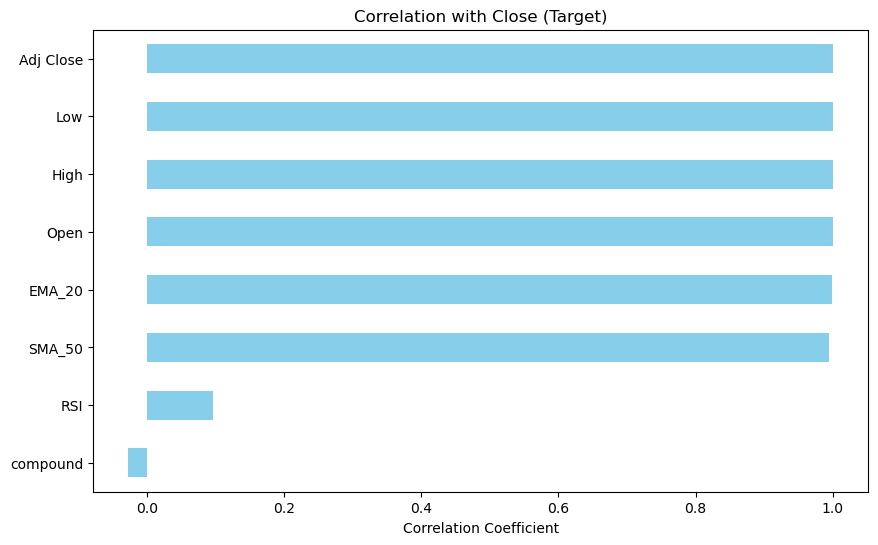

In [4]:
features = ['Open', 'High', 'Low', 'Adj Close', 'SMA_50', 'EMA_20', 'RSI', 'compound']

# Calculate correlations
correlation_close_only = data[features].corrwith(data['Close'])

plt.figure(figsize=(10, 6))
correlation_close_only.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlation with Close (Target)')
plt.xlabel('Correlation Coefficient')
plt.show()

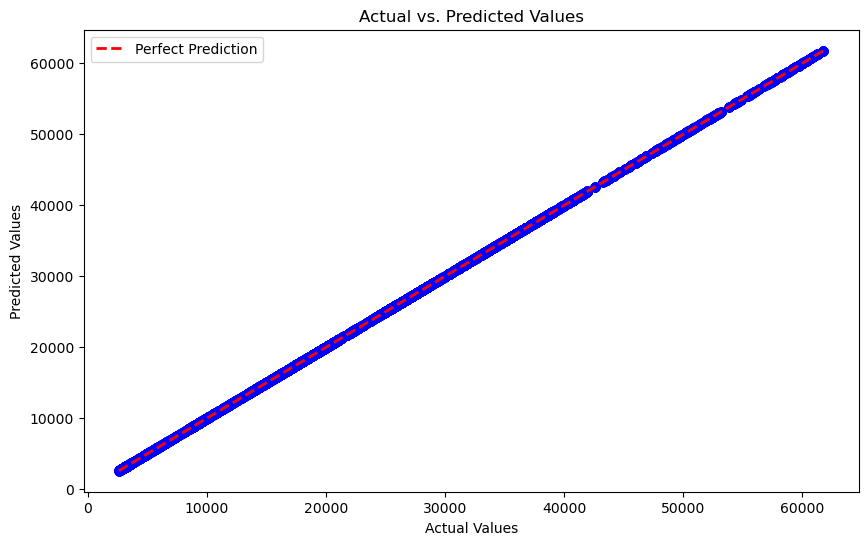

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Model Evaluation Summary

## R2 Scores

- **Fold 1:** Negative R2 score (-0.8953) suggests potential overfitting.
- **Folds 2-5:** Positive R2 scores (0.9756, 0.9969, 0.9894) indicate good generalization.

## Mean Squared Error (MSE) and R-squared (R2) Score

- **MSE:** Low value (3.8013) implies accurate predictions.
- **R2 Score:** High value (0.9999999744) indicates capturing most variance.

## Conclusion

This project demonstrates the application of a hybrid model for stock price prediction, combining numerical analysis and sentiment analysis. It provides insights into the relationship between news sentiment and stock performance.
